# Seaborn facet grids

### Import modules

In [1]:
import seaborn
import pandas
import os
import matplotlib.pyplot as plt
seaborn.set(rc={'figure.figsize':(12,9)})
seaborn.set(style = "ticks", color_codes = True)

In [2]:
datasets = os.listdir("/users/danielcorcoran/desktop/github_repos/python_nb_visualization/seaborn_official_datasets/")

for dataset_name in datasets:
    print(dataset_name)


mpg.csv
fmri.csv
gammas.csv
diamonds.csv
planets.csv
exercise.csv
tips.csv
iris.csv
titanic.csv
car_crashes.csv
dots.csv
brain_networks.csv
anscombe.csv
flights.csv
attention.csv


### Read in tips dataset

In [3]:
tips = pandas.read_csv("/users/danielcorcoran/desktop/github_repos/python_nb_visualization/seaborn_official_datasets/tips.csv")

In [4]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## Examples

### Initialize facet grid 

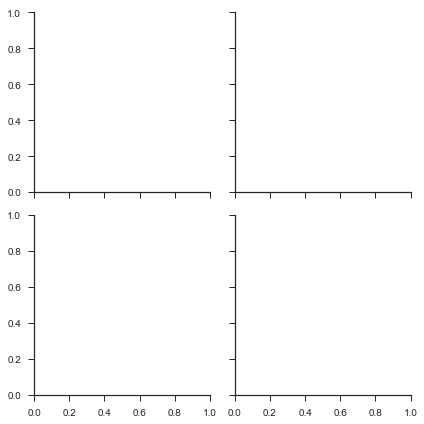

In [5]:
g = seaborn.FacetGrid(tips, col = "smoker", row = "sex")

### Facet Grid col_wrap parameter (items per column)

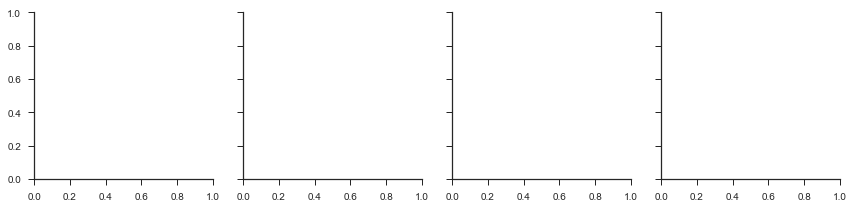

In [6]:
g = seaborn.FacetGrid(tips, col = "day", col_wrap = 4)

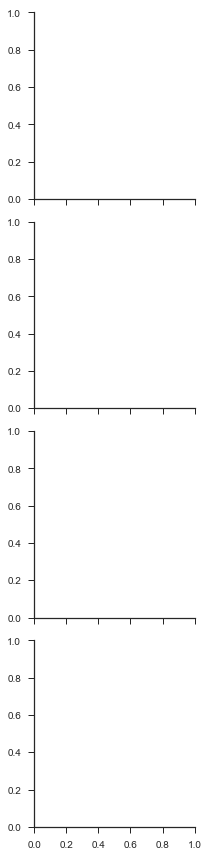

In [7]:
g = seaborn.FacetGrid(tips, col = "day", col_wrap = 1)

### Facet Grid histogram 

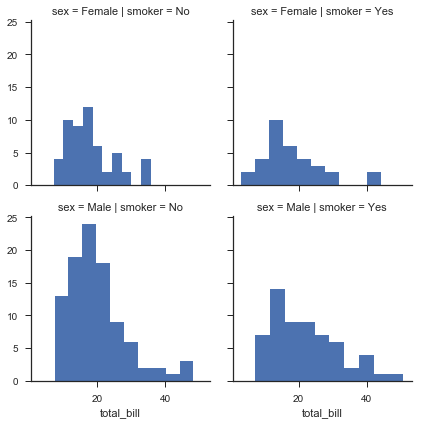

In [8]:
g = seaborn.FacetGrid(tips, 
                      col = "smoker", 
                      row = "sex")
g = g.map(plt.hist, 
          "total_bill")

### Facet Grid histogram with column sorting

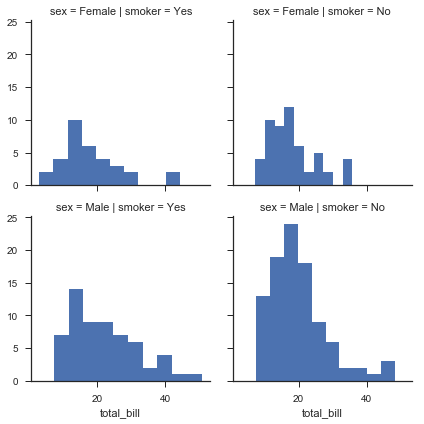

In [9]:
g = seaborn.FacetGrid(tips, 
                      col = "smoker",
                      col_order = ["Yes", "No"],
                      row = "sex")
g = g.map(plt.hist, 
          "total_bill")

### Facet Bar Chart

In [10]:
subset = tips[(tips["sex"] == "Female") & \
           (tips["smoker"] == "Yes") & \
           (tips["day"] == "Sun")]

In [11]:
subset

,total_bill,tip,sex,smoker,day,time,size
164,17.51,3.0,Female,Yes,Sun,Dinner,2
178,9.60,4.0,Female,Yes,Sun,Dinner,2
186,20.90,3.5,Female,Yes,Sun,Dinner,3
188,18.15,3.5,Female,Yes,Sun,Dinner,3


In [12]:
subset.describe()

,total_bill,tip,size
count,4.000000,4.000000,4.00000
mean,16.540000,3.500000,2.50000
std,4.854764,0.408248,0.57735
min,9.600000,3.000000,2.00000
25%,15.532500,3.375000,2.00000
50%,17.830000,3.500000,2.50000
75%,18.837500,3.625000,3.00000
max,20.900000,4.000000,3.00000


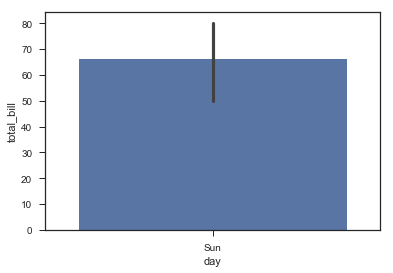

In [13]:
seaborn.barplot(data = subset, y = 'total_bill', x = "day", estimator = sum)

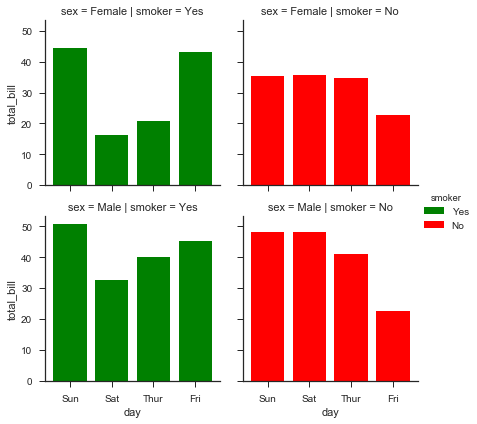

In [14]:
#what is the facet grid aggregating method?

g = seaborn.FacetGrid(tips, 
                      col = "smoker",
                      col_order = ["Yes", "No"],
                      row = "sex",
                      hue = "smoker",
                      hue_order = ["Yes", "No"],
                      palette = ["green","red"])
g = g.map(plt.bar,  
          "day","total_bill").add_legend()

### Facet Grid Scatter with legend

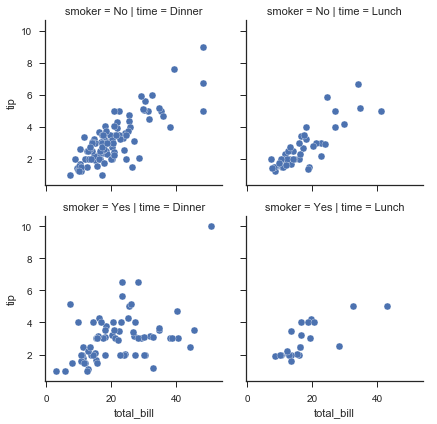

In [15]:
g = seaborn.FacetGrid(tips, col = "time", row = "smoker")
g = g.map(plt.scatter, "total_bill", "tip", edgecolor = "w").add_legend()

### Facet Grid Scatter with legend and palette

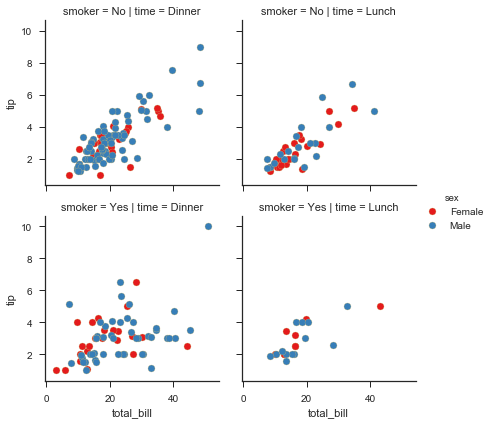

In [16]:
g = seaborn.FacetGrid(tips, 
                      col = "time", 
                      row = "smoker", 
                      hue = "sex",
                     palette = "Set1")
g = g.map(plt.scatter, 
          "total_bill", 
          "tip", 
          edgecolor = "y")\
.add_legend()

### Facet Grid Scatter with custom markers, legend order, and palette

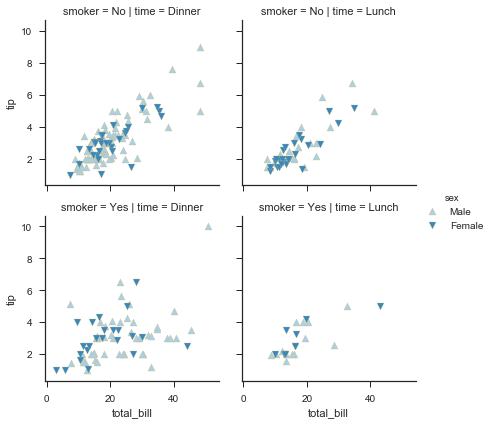

In [17]:
g = seaborn.FacetGrid(tips, 
                      col = "time", 
                      row = "smoker", 
                      hue = "sex",
                      hue_kws = dict(marker = ["^", "v"]),
                      hue_order = ["Male", "Female"],
                      palette = "Blues")
g = g.map(plt.scatter, 
          "total_bill", 
          "tip", 
          edgecolor = "y")\
.add_legend()

### Facet Grid with axis limits

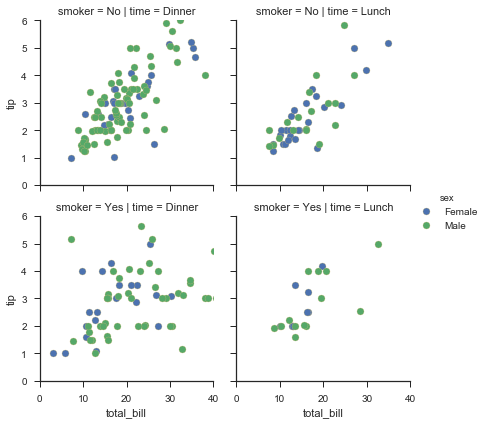

In [18]:
g = seaborn.FacetGrid(tips, 
                      col = "time", 
                      row = "smoker", 
                      hue = "sex")
g = g.map(plt.scatter, 
          "total_bill", 
          "tip", 
          edgecolor = "y")\
.add_legend()\
.set(xlim = (0,40),
    ylim = (0,6))

### Saving figure as .svg (svg scales very well compared to .png)

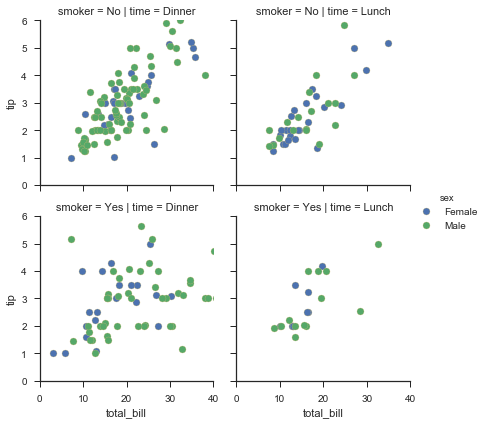

In [19]:
g = seaborn.FacetGrid(tips, 
                      col = "time", 
                      row = "smoker", 
                      hue = "sex")
g = g.map(plt.scatter, 
          "total_bill", 
          "tip", 
          edgecolor = "y")\
.add_legend()\
.set(xlim = (0,40),
    ylim = (0,6))\
.savefig("/users/danielcorcoran/desktop/fig.svg")